### Exemplo: No nosso caso, vamos ver a performance de uma carteira de ativos. Vamos chamar de carteira do Lira.

- Temos o arquivo 'Carteira.xlsx' com os ativos e suas respectivas quantidades
- Vamos analisar como que os ativos performaram, quanto que rendeu a carteira como um todo e comparar com o IBOV

In [19]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import yfinance as yf 

carteira = pd.read_excel('Carteira.xlsx')
display(carteira)

acao = yf.Ticker('SMAL11.SA')

,Ativos,Tipo,Qtde
0,BOVA11,ETF,100
1,SMAL11,ETF,100
2,MGLU3,Ação,1000
3,BBDC4,Ação,100
4,ITUB4,Ação,100
5,ENEV3,Ação,300
6,MOVI3,Ação,100
7,BPAC11,Ação,100
8,GNDI3,Ação,100
9,NTCO3,Ação,100


### Criando nosso dataframe de Cotações dos ativos da carteira

In [20]:
df_carteira = pd.DataFrame()

for ativo in carteira['Ativos']:
    print(ativo)
    df_carteira[ativo] = yf.download(f'{ativo}.SA',start='2020-01-01',end='2023-07-20')['Adj Close']
    
df_carteira.reset_index(inplace=True)
df_carteira.dropna(axis=1,inplace=True)
display(df_carteira)

BOVA11
[*********************100%***********************]  1 of 1 completed
SMAL11
[*********************100%***********************]  1 of 1 completed
MGLU3
[*********************100%***********************]  1 of 1 completed
BBDC4
[*********************100%***********************]  1 of 1 completed
ITUB4
[*********************100%***********************]  1 of 1 completed
ENEV3
[*********************100%***********************]  1 of 1 completed
MOVI3
[*********************100%***********************]  1 of 1 completed
BPAC11
[*********************100%***********************]  1 of 1 completed
GNDI3
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['GNDI3.SA']: Exception('%ticker%: No timezone found, symbol may be delisted')



NTCO3
[*********************100%***********************]  1 of 1 completed
BCRI11
[*********************100%***********************]  1 of 1 completed
VILG11
[*********************100%***********************]  1 of 1 completed
KNRI11
[*********************100%***********************]  1 of 1 completed
XPLG11
[*********************100%***********************]  1 of 1 completed


,Date,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,NTCO3,BCRI11,VILG11,KNRI11
0,2020-01-02,114.239998,139.500000,12.029736,24.120605,33.529305,10.9650,17.084026,38.093487,107.035118,134.214600,179.568451
1,2020-01-03,113.800003,140.899994,11.922435,24.132811,33.176628,11.0675,17.537743,40.747009,108.315903,132.413040,179.568451
2,2020-01-06,112.589996,139.100006,11.932190,23.701750,32.682907,11.3500,17.602499,39.882378,107.467690,133.818253,178.111069
3,2020-01-07,112.239998,139.399994,11.898049,23.289993,31.924690,11.2650,17.567360,40.528366,107.611885,129.557587,178.803802
4,2020-01-08,111.949997,138.199997,12.263844,22.929705,31.404509,11.2125,17.655201,40.737072,105.661018,125.630280,168.682831
...,...,...,...,...,...,...,...,...,...,...,...,...
877,2023-07-13,115.580002,110.000000,3.020000,16.549999,28.580000,12.3000,10.880000,16.309999,77.550003,107.540001,159.179993
878,2023-07-14,113.959999,108.000000,2.950000,16.430000,28.280001,12.1600,10.360000,15.710000,77.290001,107.669998,159.740005
879,2023-07-17,114.709999,108.500000,2.960000,16.600000,28.830000,12.1600,10.600000,15.660000,76.500000,108.000000,160.000000
880,2023-07-18,113.949997,108.610001,2.960000,16.570000,28.270000,12.3700,10.480000,15.590000,76.550003,107.989998,160.610001


In [21]:
df_carteira.set_index('Date',inplace=True)

### Será que todos os dados vieram corretos?

### Ajustando os dados

### Vamos ver como que as ações foram individualmente

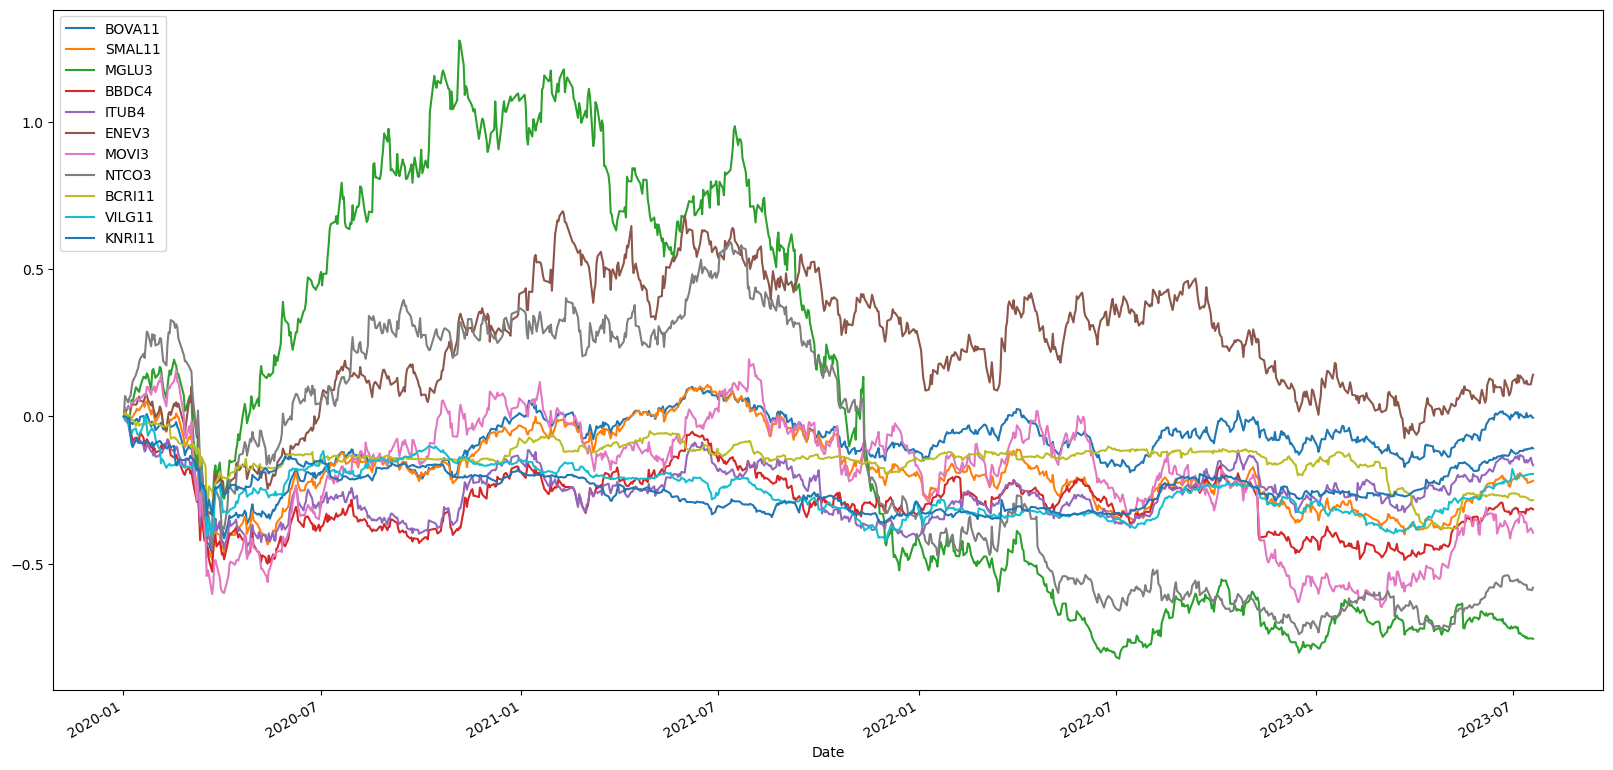

In [22]:
carteira_norm = df_carteira / df_carteira.iloc[0] - 1 
carteira_norm.plot(figsize=(20,10))
plt.legend(loc=2)
plt.show()

### Vamos puxar o IBOV para comparar

In [23]:
carteira_ibov = yf.download('^BVSP',start='2020-01-01',end='2023-07-20')

[*********************100%***********************]  1 of 1 completed


### Criando um dataframe da Carteira com as quantidades de ações

In [24]:
valor_investido = pd.DataFrame()
carteira.drop([7,8,13],inplace=True)

In [25]:
for ativo in carteira['Ativos']:
    valor_investido[ativo] = df_carteira[ativo] * carteira.loc[carteira['Ativos']== ativo,'Qtde'].values[0]
display(valor_investido)

,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,NTCO3,BCRI11,VILG11,KNRI11
Date,,,,,,,,,,,
2020-01-02,11423.999786,13950.000000,12029.735565,2412.060547,3352.930450,3289.500046,1708.402634,3809.348679,10703.511810,13421.459961,17956.845093
2020-01-03,11380.000305,14089.999390,11922.434807,2413.281059,3317.662811,3320.250034,1753.774261,4074.700928,10831.590271,13241.304016,17956.845093
2020-01-06,11258.999634,13910.000610,11932.189941,2370.174980,3268.290710,3405.000114,1760.249901,3988.237762,10746.768951,13381.825256,17811.106873
2020-01-07,11223.999786,13939.999390,11898.049355,2328.999329,3192.469025,3379.500103,1756.735992,4052.836609,10761.188507,12955.758667,17880.380249
2020-01-08,11194.999695,13819.999695,12263.843536,2292.970467,3140.450859,3363.749886,1765.520096,4073.707199,10566.101837,12563.027954,16868.283081
...,...,...,...,...,...,...,...,...,...,...,...
2023-07-13,11558.000183,11000.000000,3019.999981,1654.999924,2857.999992,3690.000057,1088.000011,1630.999947,7755.000305,10754.000092,15917.999268
2023-07-14,11395.999908,10800.000000,2950.000048,1643.000031,2828.000069,3647.999954,1035.999966,1571.000004,7729.000092,10766.999817,15974.000549
2023-07-17,11470.999908,10850.000000,2960.000038,1660.000038,2882.999992,3647.999954,1060.000038,1565.999985,7650.000000,10800.000000,16000.000000


### Comparação Carteira x IBOV

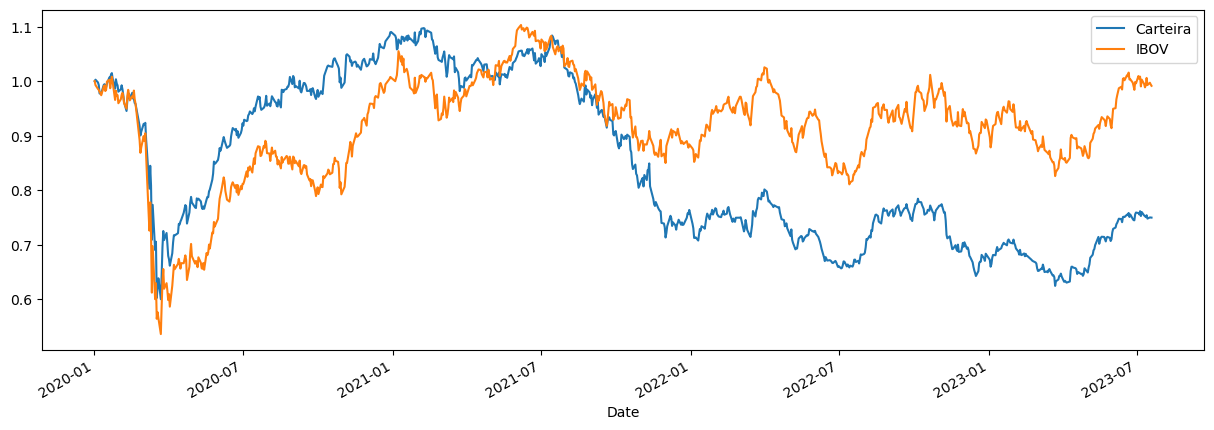

In [26]:
valor_investido['Total'] = valor_investido.sum(axis=1)

valor_investido_norm = valor_investido / valor_investido.iloc[0]
carteira_ibov = carteira_ibov / carteira_ibov.iloc[0]

valor_investido_norm['Total'].plot(figsize=(15,5),label='Carteira')
carteira_ibov['Adj Close'].plot(figsize=(15,5),label='IBOV')
plt.legend()
plt.show()

In [27]:
retorno_carteira = valor_investido['Total'][-1] /  valor_investido['Total'][0] - 1
retorno_ibov =  carteira_ibov['Adj Close'][-1] / carteira_ibov['Adj Close'][0] - 1 
print(f'Retorno Carteira: {retorno_carteira:.2%}')
print(f'Retorno IBOV: {retorno_ibov:.2%}')

Retorno Carteira: -25.03%
Retorno IBOV: -0.86%


### Correlação da Carteira com o IBOV

In [28]:
relacao = valor_investido['Total'].corr(carteira_ibov['Adj Close']) 
print(relacao)

0.4022119885933741
